# 확률적 경사 하강법

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/4-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## SGDClassifier



알고리즘이 아님, 온라인(점진적) 학습이 가능한 최적화 방법
기본작동구조는 가장 가파른 경사를 찾아가되, 조금씩(합리적으로) 찾아간다,
경사를 따라간다 = 훈련을 하는것

경사= 손실함수 (나쁜정도를 측정하는 함수 )
최저점(가장아래 = 손실함수의 최저점 )을
 = 모델이 최적의 매개변수(가중치와 편향)를 찾았다는 것

전체 샘플을 사용하지 않고 훈련 세트에서 딱 하나의 샘플을 랜덤하게 선택하게 가파른 경사를 조금씩 내려온다.
그 다음 훈련 세트에서 또 하나를 선택해서 경사를 조금 내려간다. 이 방법으로 모든 샘플을 사용 할 때 까지 반복
모든 샘플을 사용 했는데도 만족하는 곳 까지 도달하지 못했을 경우 샘플을 처음부터 다시 랜덤으로 사용

Epoch  : 이렇게 훈련 세트를 한 번 모두 사용하는 과정

미니배치 경사 하강법 :
여러개의 샘플(갯수는 사용자 지정가능 = 하이퍼파라미터)을 사용해 경사 하강법을 수행

배치 경사 하강법 : 경사로를 따라 이동하기 위해 전체 샘플을 사용.
가장 좋고 지름길,안전함, 데이터가 너무 많기 때문에 컴퓨터의 성능에 좌우되는부분 프로세싱 유닛들의 성능적 문제
(거의 사용 X)

데이터 전처리 이유

데이터 전처리는 머신러닝의 성능을 높이고 신뢰할 수 있는 결과를 얻기 위해 필수적 단계.

1. **데이터 품질 문제 해결**
   누락값, 이상값, 중복 데이터 등을 처리하지 않으면 모델이 왜곡된 학습을 할 수 있다

2. **일관성 유지**
   데이터의 형식과 범위를 정리해 모델이 입력 데이터를 더 효과적으로 처리할 수 있도록 함.

3. **스케일 조정**
   특성(feature) 간의 크기 차이를 줄여 모델이 특정 특성에 과도하게 의존하지 않도록함( 정규화, 표준화).

4. **노이즈 감소**
   데이터에서 불필요하거나 비관련 요소를 제거하여 모델의 학습 효율을 높임.

5. **특성 선택 및 생성**
   모델 성능을 향상시키는 중요한 특성을 선택하거나 새로운 유용한 특성을 생성.

전처리를 제대로 하지 않으면 모델이 잘못된 학습을 하거나 성능이 저하될 가능성이있다.

Pandas 사용 이유
데이터 분석과 조작을 위한 강력한 파이썬 라이브러리.

### 주요 기능:
1. **데이터 구조**
   - **DataFrame**: 2차원 테이블 구조로, 엑셀 스프레드시트와 유사합니다.
   - **Series**: 1차원 배열로, DataFrame의 한 열을 나타낼 수 있습니다.

2. **데이터 로딩**
   - 다양한 파일 형식(예: CSV, Excel, SQL, JSON 등)에서 데이터를 쉽게 읽고 쓸 수 있다.
   ```python
   import pandas as pd
   df = pd.read_csv('file.csv')  # CSV 파일 불러오기
   ```

3. **데이터 조작**
   - 데이터 정렬, 필터링, 그룹화, 병합 등을 손쉽게 수행할 수 있습니다.
   ```python
   filtered_df = df[df['column_name'] > 50]  # 조건에 맞는 데이터 필터링
   grouped_df = df.groupby('column_name').sum()  # 데이터 그룹화 후 합계 계산
   ```

4. **결측치 처리**
   - 결측값을 제거하거나 대체하는 방법을 제공합니다.
   ```python
   df.dropna()  # 결측값이 있는 행 제거
   df.fillna(0)  # 결측값을 0으로 대체
   ```

5. **데이터 시각화**
   - matplotlib과 연동하여 데이터 시각화를 간편하게 할 수 있습니다.
   ```python
   df.plot()  # 기본 그래프 그리기
   ```

6. **시간 데이터 처리**
   - 시간 데이터의 생성, 변환, 조작을 쉽게 할 수 있는 다양한 기능을 제공합니다.
   ```python
   df['date'] = pd.to_datetime(df['date_column'])  # 문자열을 datetime 객체로 변환
   ```

7. **데이터 정렬 및 순위 매기기**
   - 데이터프레임의 행이나 열을 기준으로 정렬하고 순위를 매길 수 있습니다.
   ```python
   df_sorted = df.sort_values(by='column_name')  # 특정 열을 기준으로 정렬
   df['rank'] = df['column_name'].rank()  # 특정 열의 값에 따라 순위 매기기
   ```

이 외에도 Pandas는 데이터 분석을 위한 다양한 기능을 제공하여 효율적인 데이터 조작 및 분석이 가능합니다. 필요에 따라 적절한 기능을 사용하여 데이터를 효과적으로 처리할 수 있습니다. 더 궁금한 점이 있으면 언제든지 물어보세요! 😊

In [ ]:

import pandas as pd
#데이터를 반드시 전처리 필요#
#특성 각각의 스케일이 다르기 떄문
fish = pd.read_csv('https://bit.ly/fish_csv_data')
#리드 함수 사용해서 데이터 프레임으로 바꾸고 로딩한다.

In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
#데이터 프레임에 다섯개의 열을 넘파이로 바꿔서 
fish_target = fish['Species'].to_numpy()
#스피시즈는 타깃값으로 바꿔 넘파이 배열로 저장함

from sklearn.model_selection import train_test_split
# 분할 메서드는 문자열을 특정 구분자를 기준으로 나누어 문자열의 리스트로 반환하는 기능

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42) #난수생성기

from sklearn.preprocessing import StandardScaler
# 가장중요 경사하강법은 스케일을 꼭 조정

ss = StandardScaler() # 평균값 표준편차
ss.fit(train_input) # 위 값으로 훈련세트를 바꾸고 테스트 세트를 바꿈

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

Pandas의 `.to_numpy()` 메서드는 DataFrame 또는 Series 객체를 NumPy 배열로 변환하는 기능. 이 메서드는 특히 데이터 분석 및 조작에서 효율적으로 수학적 연산을 수행할 때 유용.

### 주요 기능:
- **DataFrame 또는 Series 객체를 NumPy 배열로 변환**: 데이터를 NumPy 배열 형식으로 변환하여 다양한 수학적 연산과 통계 작업을 쉽게 수행할 수 있음
  ```python
  import pandas as pd

  # 예제 DataFrame 생성
  df = pd.DataFrame({
      'A': [1, 2, 3],
      'B': [4, 5, 6],
      'C': [7, 8, 9]
  })

  # DataFrame을 NumPy 배열로 변환
  numpy_array = df.to_numpy()
  print(numpy_array)
  ```

### 출력 예시:
```python
array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])
```

### 장점:
- **효율적인 연산**: NumPy 배열은 Pandas DataFrame보다 수학적 연산에 더 효율적입니다.
- **연동성**: NumPy 배열로 변환하면 NumPy 라이브러리의 다양한 기능과 메서드를 활용할 수 있습니다.
- **간편한 변환**: 데이터를 바로 NumPy 배열로 변환할 수 있어 코드의 간결성과 가독성이 높아집니다.

데이터 분석 작업에서 매우 유용하게 사용될 수 있으며, 특히 수치 데이터의 연산이 많이 필요한 경우 유리함.

In [ ]:
from sklearn.linear_model import SGDClassifier
#확률적 경사 하강법의 분류 알고리즘, 회귀알고리즘과 다름(degressor)
#선형모델이기 때문에 linear

In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42) # max iter = epoch 점진적 학습이 가능하게 적은 수 10 iteration 반복
# 로지스틱 손실함수지정, 로지스틱 회귀모델 훈련, SGD는 머신러닝 방법이 아니라 최적화 방법, loss 함수로 log 함수를 지정했음
sc.fit(train_scaled, train_target)
# fit method 는 전체데이터, 일괄 학습
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
#score 는 정확도를 출력, 테스트 정확도가 높기 떄문에 더 훈련을 진행 = 과소적합

sc.partial_fit(train_scaled, train_target)
# fit 메서드 만 쓰면 가중치,편향성을 다 버리고 새로 학습 그래서 partial을 써서기존의 w.b를 그대로 유지하고 학습
# partial_fit = 점진적, 온라인 학습
#W- 가중치, B-편향

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
#따라서 점진적 학습을 통해 정확도가 증가

0.773109243697479
0.775
0.8151260504201681
0.85


C:\Users\juneo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


1. 가중치 (
𝑤
)
의미: 가중치는 입력 데이터의 각 특성(feature)과 연결되어 있으며, 입력 값이 출력에 얼마나 영향을 미치는지를 나타냅니다.

역할: 입력 값에 곱해져서 출력 값을 계산하는 데 사용됩니다.

학습 과정: 모델 학습 과정에서 가중치는 최적화 알고리즘(예: 경사하강법)에 의해 조정됩니다. 이를 통해 모델의 예측이 실제 값에 가까워지도록 합니다.

2. 편향 (
𝑏
)
의미: 편향은 모델이 입력 데이터와 독립적으로 학습하는 상수 값입니다.

역할: 편향은 입력 값이 0일 때도 일정한 출력을 만들도록 도와줍니다. 이는 모델이 더 유연하게 데이터를 학습할 수 있도록 합니다.

학습 과정: 마찬가지로 편향도 학습 과정에서 조정됩니다. 이를 통해 모델이 더 정확한 예측을 할 수 있게 합니다.

## 에포크와 과대/과소적합

결정계수 R^2 (R squared) = 해당 모형이 타켓 변수를 얼마나 잘 예측,설명하는지 평가하는 지표

두번째그래프
절충점을 찾기

## 조기 종료

In [ ]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)
# unique 해당 Series에서 중복을 제거한 유일한 값들을 배열 형태로 반환
for _ in range(0, 300): #과대/과소 지점을 찾아내기 위해 넓은 값으로 테스트
    # 규제가 커질수록 과대적합에 가까워짐, 에포크를 크게 늘려 측정한뒤, 조기 종료 얼리스탑
    sc.partial_fit(train_scaled, train_target, classes=classes)
#classes 매개변수를 쓰는 이유 = fit 없이 바로 parital 메서드(데이터를 일부분 쓰는것이 기본)를 쓸때는, 전체 샘플의 클래스 갯 수 목록을 전달해야함
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))
    #스코어를 스코어 안에 추가한 이유는 그래프로 표현하기 위함

sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
# 그래서 100으로 주었다 과소,과대적합을 피하기 위함함
# 많이 훈련하면 좋지만, 소스를 많이 쓰는것이기 떄문에 비효율
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


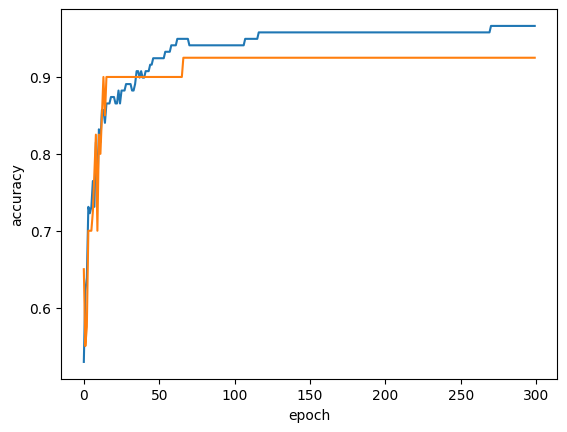

In [ ]:
import matplotlib.pyplot as plt
#.pyplot 데이터 시각화
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

#아래 그림중 100 에포크가 절충점

## 힌지, 서포트 벡터 머신

In [ ]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
#또 다른 머신러닝 알고리즘-서포트벡터머신,SVM  - SGD 와 다름름
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
#딥러닝 파트에선 훈련 데이터가 너~무 많기 떄문에 SGD를 반드시 사용하게 된다

0.9495798319327731
0.925
